# Python Tutorial (Day 2)

## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

Numpy arrays are great alternatives to Python Lists. Some of the key advantages of Numpy arrays are that they are fast, easy to work with, and give users the opportunity to perform calculations across entire arrays.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [78]:
import numpy as np

In [79]:
a = np.array([1, 2, 3]) # Create a rank 1 array
print(a)
print(type(a)) #check its type
print(a.shape) #currently, only one dimension available, but result common await for another dimension
print(a[0], a[1], a[2])
a[0] = 5                # Change an element of the array, because it's a tuple
print(a)

[1 2 3]
<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [80]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [81]:
print(b.shape)
print(b.size)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
6
1 2 4


Numpy also provides many functions to create arrays:

In [82]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [83]:
e = np.random.random((2,2)) # Create an array filled with random values, 1. generate random 2. pull out random
print(e)

[[0.26865512 0.68754135]
 [0.42483548 0.07559375]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [84]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2): up to 3 but not include column 3
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

A slice of an array is a view into the same data, so modifying it will modify the original array.

In [85]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1], overwrite b also overwrite a
print(a[0, 1])

2
77


In [86]:
print(a)

[[ 1 77  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [87]:
# If you want to avoid this, make a copy==和PS一样诶
b = a[:2, 1:3].copy()

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [88]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape) #however dimension dosen't matter that much?

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


For brevity I left out a lot of details about numpy array indexing; if you want to know more you should read the [documentation](https://docs.scipy.org/doc/numpy/user/quickstart.html#the-basics).

### Reshape

Sometimes we want to change the dimensions of an array while keeping its values. In this case, we use [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

In [89]:
a = np.array([[1,2,3], [4,5,6]])
print(a)
print(a.shape) # 2 rows and 3 columns
print(np.reshape(a, 6)) # 6 elements
print(np.reshape(a, (6,1))) # 6 rows, 1 column
print(np.reshape(a, (3,2))) # 3 rows, 2 columns
print(np.reshape(np.reshape(a, 6), (2,3))) # 6 elements, then back to 2 rows and 3 columns!!!!!!!

[[1 2 3]
 [4 5 6]]
(2, 3)
[1 2 3 4 5 6]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]


### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [90]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.float64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 float64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html). See also: [extended precision](https://numpy.org/doc/stable/user/basics.types.html#extended-precision) on 64-bit floating numbers.

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads (e.g. +) and as functions in the numpy module:

In [91]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print(y)

[[1. 2.]
 [3. 4.]]
[[5. 6.]
 [7. 8.]]


In [92]:
# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [93]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [94]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [95]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [96]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


### Exercise

Given the arrays a and b,


1.   From a, select all but the first and last element
2.   Reshape the result into two rows and three columns
3.   Multiply the resulting matrix with b



In [98]:
a = np.array(range(1,9))
b = np.array([[1,4,2],[7,5,3]])

In [100]:
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [103]:
#1
a = a[1:-1]

In [104]:
a

array([2, 3, 4, 5, 6, 7])

In [105]:
#2
a = np.reshape(a, (2,3))

In [106]:
a * b

array([[ 2, 12,  8],
       [35, 30, 21]])

## Data Frames

In computational social science, a lot of data come in tabular format. In R, we use built-in data frames. In Python, we use [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) data frames.

We will learn what Pandas is capable of by exploring the [Complete Competitive Pokémon Database](https://www.kaggle.com/datasets/giorgiocarbone/complete-competitive-pokmon-datasets-may-2022?select=df_pokemon.csv).

![](https://static.wikia.nocookie.net/pokemon/images/9/95/Kanto_Pok%C3%A9mon.png/revision/latest/scale-to-width-down/1000?cb=20190718185033)

In [20]:
# Since Kaggle requires an account, I'm providing the dataset for you
# Download it into your Colab session like this:
!gdown '1SbMti6NKz2ovoRtRXdLS2eFnNvuQoSNh'
# And extract the zip file
!unzip dataset_pokemon.zip

Downloading...
From: https://drive.google.com/uc?id=1SbMti6NKz2ovoRtRXdLS2eFnNvuQoSNh
To: /content/dataset_pokemon.zip
100% 484k/484k [00:00<00:00, 23.3MB/s]
Archive:  dataset_pokemon.zip
   creating: dataset_pokemon/
  inflating: dataset_pokemon/bridge_moves_pokemon_GMAX_MOVE.csv  
  inflating: dataset_pokemon/bridge_move_type_MOVES_IS_TYPE.csv  
  inflating: dataset_pokemon/bridge_pokemon_ability_MAY_HAS.csv  
  inflating: dataset_pokemon/bridge_pokemon_item_USED_WITH_ITEM.csv  
  inflating: dataset_pokemon/bridge_pokemon_moves_MAY_LEARN.csv  
  inflating: dataset_pokemon/bridge_pokemon_move_USED_WITH_MOVE.csv  
  inflating: dataset_pokemon/bridge_pokemon_nature_COMMON_SPREAD.csv  
  inflating: dataset_pokemon/bridge_pokemon_nature_USED_WITH_ABILITY.csv  
  inflating: dataset_pokemon/bridge_pokemon_pokemon_EVOLVES_FROM.csv  
  inflating: dataset_pokemon/bridge_pokemon_pokemon_HAS_VARIANT.csv  
  inflating: dataset_pokemon/bridge_pokemon_pokemon_USED_IN_TEAM_WITH.csv  
  inflating: da

### Basics

In [107]:
!pwd

/content


In [109]:
!ls

dataset_pokemon  dataset_pokemon.zip  hp_kde.png  new_directory  sample_data


In [21]:
# Load pandas
import pandas as pd

In [22]:
# Read in one of the csv files and take a look at it
df = pd.read_csv("dataset_pokemon/df_pokemon.csv")
df

,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,Type2,...,Attack,Defense,Sp. Atk,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank
0,1,Bulbasaur,Bulbasaur,NaN,1,Common,NaN,False,Grass,Poison,...,49.0,49.0,65.0,65.0,45.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
1,2,Ivysaur,Ivysaur,NaN,1,Common,Bulbasaur,False,Grass,Poison,...,62.0,63.0,80.0,80.0,60.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
2,3,Venusaur,Venusaur,NaN,1,Common,Ivysaur,True,Grass,Poison,...,82.0,83.0,100.0,100.0,80.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,204,7,24
3,3,Mega Venusaur,Venusaur,Mega,6,Common,Venusaur,True,Grass,Poison,...,100.0,123.0,122.0,120.0,80.0,https://img.pokemondb.net/sprites/sword-shield...,Banned,NaN,NaN,NaN
4,3,Venusaur Gigantamax,Venusaur,Gigantamax,8,NaN,Venusaur,NaN,Grass,Poison,...,NaN,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,896,Glastrier,Glastrier,NaN,8,Legendary,NaN,False,Ice,NaN,...,145.0,130.0,65.0,110.0,30.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,13,0,86
1094,897,Spectrier,Spectrier,NaN,8,Legendary,NaN,False,Ghost,NaN,...,65.0,60.0,145.0,80.0,130.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,19,1,61
1095,898,Calyrex,Calyrex,NaN,8,Legendary,NaN,False,Psychic,Grass,...,80.0,80.0,80.0,80.0,80.0,https://img.pokemondb.net/sprites/sword-shield...,Restricted (players can include two Restricted...,NaN,NaN,NaN
1096,898,Calyrex Shadow Rider,Calyrex,Shadow Rider,8,Legendary,NaN,False,Psychic,Ghost,...,85.0,80.0,165.0,100.0,150.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,363,22,8


In [23]:
# To save the dataframe back to a csv file
df.to_csv('dataset_pokemon/df_pokemon_2.csv', index = False)
# You could also save to Google Drive the same way
# df.to_csv('/content/drive/yourdrive/df_pokemon_2.csv', index = False), so the order of row won't be written

In [24]:
# To access a single column
print(df['Name'])

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3              Mega Venusaur
4        Venusaur Gigantamax
                ...         
1093               Glastrier
1094               Spectrier
1095                 Calyrex
1096    Calyrex Shadow Rider
1097       Calyrex Ice Rider
Name: Name, Length: 1098, dtype: object


In [25]:
# In pandas, columns are referred to as Series
print(type(df['Name']))

<class 'pandas.core.series.Series'>


In [26]:
# To get a specific value of a column, by index
print(df['Name'][0])
print(df['Name'][5:9])

Bulbasaur
5              Charmander
6              Charmeleon
7        Mega Charizard Y
8    Charizard Gigantamax
Name: Name, dtype: object


In [27]:
# Number of rows and columns
df.shape # always check this for error

(1098, 22)

In [28]:
# Get an entire row
print(df.iloc[2])

ID                                                                   3
Name                                                          Venusaur
Species                                                       Venusaur
Variant                                                            NaN
Generation                                                           1
Rarity                                                          Common
Evolves_from                                                   Ivysaur
Has_gender_diff                                                   True
Type1                                                            Grass
Type2                                                           Poison
Total                                                            525.0
HP                                                                80.0
Attack                                                            82.0
Defense                                                           83.0
Sp. At

In [29]:
# To turn a column back into a numpy array (when failed to figure out what panda is doing)
print(df['HP'].values)
# Alternatively
print(df['HP'].to_numpy())
# To a list
print(df['HP'].to_list())

[ 45.  60.  80. ... 100. 100. 100.]
[ 45.  60.  80. ... 100. 100. 100.]
[45.0, 60.0, 80.0, 80.0, nan, 39.0, 58.0, 78.0, nan, 78.0, 78.0, 44.0, 59.0, nan, 79.0, 79.0, 45.0, 50.0, nan, 60.0, 40.0, 45.0, 65.0, 65.0, 40.0, 63.0, 83.0, 83.0, 30.0, 30.0, 55.0, 75.0, 40.0, 65.0, 35.0, 60.0, nan, 35.0, 45.0, 60.0, 60.0, 50.0, 50.0, 75.0, 75.0, 55.0, 70.0, 90.0, 46.0, 61.0, 81.0, 70.0, 95.0, 38.0, 38.0, 73.0, 73.0, 115.0, 140.0, 40.0, 75.0, 45.0, 60.0, 75.0, 35.0, 60.0, 60.0, 70.0, 10.0, 10.0, 35.0, 35.0, 40.0, 40.0, 50.0, nan, 65.0, 65.0, 50.0, 80.0, 40.0, 65.0, 60.0, 55.0, 95.0, 90.0, 40.0, 65.0, 90.0, 25.0, 40.0, 55.0, 55.0, 70.0, 80.0, nan, 90.0, 50.0, 65.0, 80.0, 40.0, 80.0, 40.0, 40.0, 55.0, 55.0, 80.0, 80.0, 50.0, 50.0, 65.0, 65.0, 90.0, 90.0, 95.0, 95.0, 95.0, 25.0, 50.0, 52.0, 52.0, 35.0, 60.0, 65.0, 90.0, 80.0, 80.0, 105.0, 105.0, 30.0, 50.0, 30.0, 45.0, 60.0, nan, 60.0, 35.0, 60.0, 85.0, 30.0, nan, 55.0, 40.0, 40.0, 60.0, 60.0, 60.0, 95.0, 95.0, 50.0, 60.0, 60.0, 50.0, 50.0, 90.0, 40

In [30]:
# Looping over the values of a series with enumerate
for i,j in enumerate(df['Name']):
  print(i,j)

0 Bulbasaur
1 Ivysaur
2 Venusaur
3 Mega Venusaur
4 Venusaur Gigantamax
5 Charmander
6 Charmeleon
7 Mega Charizard Y
8 Charizard Gigantamax
9 Mega Charizard X
10 Charizard
11 Squirtle
12 Wartortle
13 Blastoise Gigantamax
14 Blastoise
15 Mega Blastoise
16 Caterpie
17 Metapod
18 Butterfree Gigantamax
19 Butterfree
20 Weedle
21 Kakuna
22 Beedrill
23 Mega Beedrill
24 Pidgey
25 Pidgeotto
26 Pidgeot
27 Mega Pidgeot
28 Rattata
29 Alolan Rattata
30 Raticate
31 Alolan Raticate
32 Spearow
33 Fearow
34 Ekans
35 Arbok
36 Pikachu Gigantamax
37 Pikachu
38 Partner Pikachu
39 Alolan Raichu
40 Raichu
41 Alolan Sandshrew
42 Sandshrew
43 Sandslash
44 Alolan Sandslash
45 Nidoran♀
46 Nidorina
47 Nidoqueen
48 Nidoran♂
49 Nidorino
50 Nidoking
51 Clefairy
52 Clefable
53 Vulpix
54 Alolan Vulpix
55 Ninetales
56 Alolan Ninetales
57 Jigglypuff
58 Wigglytuff
59 Zubat
60 Golbat
61 Oddish
62 Gloom
63 Vileplume
64 Paras
65 Parasect
66 Venonat
67 Venomoth
68 Alolan Diglett
69 Diglett
70 Alolan Dugtrio
71 Dugtrio
72 Meo

In [31]:
# Unique list of types
df['Type1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ice', 'Ground', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], dtype=object)

In [32]:
# The number of times each type occurs
df['Type1'].value_counts()

,count
Type1,
Water,142
Normal,120
Grass,97
Bug,85
Psychic,81
Fire,71
Electric,65
Rock,61
Dark,48


### Sorting

In [33]:
# Sort the data frame to get the Pokemon with the highest HP
df = df.sort_values('HP', ascending = False)
print(df['Name'][0])
# This isn't quite working yet
# It still shows the Pokemon whose index is 0

Bulbasaur


In [34]:
# Reset index to 0:N
df = df.reset_index()

# Now it works
print(df['Name'][0])

# By default, reset_index will make the old index a column in case we want it back
# To prevent this, use drop = True
# df = df.reset_index(drop = True)

Blissey


### Subsetting

In [35]:
# Keep only specific columns
df[['Name', 'Generation', 'Type1']]

,Name,Generation,Type1
0,Blissey,2,Normal
1,Eternatus Eternamax,8,Poison
2,Chansey,1,Normal
3,Guzzlord,7,Dark
4,Zygarde Complete Forme,6,Dragon
...,...,...,...
1093,Alcremie Gigantamax,8,Fairy
1094,Copperajah Gigantamax,8,Steel
1095,Duraludon Gigantamax,8,Steel
1096,Urshifu (Single Strike) Gigantamax,8,Fighting


In [36]:
# Restrict the data frame to all Pokemon whose Type is Psychic
df[df['Type1'] == 'Psychic']

,index,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,...,Attack,Defense,Sp. Atk,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank
6,266,202,Wobbuffet,Wobbuffet,NaN,2,Common,Wynaut,True,Psychic,...,33.0,58.0,33.0,58.0,33.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
17,959,792,Lunala,Lunala,NaN,7,Legendary,Cosmoem,False,Psychic,...,113.0,89.0,137.0,107.0,97.0,https://img.pokemondb.net/sprites/sword-shield...,Restricted (players can include two Restricted...,43,2,38
18,958,791,Solgaleo,Solgaleo,NaN,7,Legendary,Cosmoem,False,Psychic,...,137.0,107.0,113.0,89.0,97.0,https://img.pokemondb.net/sprites/sword-shield...,Restricted (players can include two Restricted...,188,4,31
36,607,488,Cresselia,Cresselia,NaN,4,Legendary,NaN,False,Psychic,...,70.0,120.0,75.0,130.0,85.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,10,0,195
38,639,518,Musharna,Musharna,NaN,5,Common,Munna,False,Psychic,...,55.0,85.0,107.0,95.0,29.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,358,281,Kirlia,Kirlia,NaN,3,Common,Ralts,False,Psychic,...,35.0,35.0,65.0,55.0,50.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
1052,357,280,Ralts,Ralts,NaN,3,Common,NaN,False,Psychic,...,25.0,25.0,45.0,35.0,40.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
1054,89,63,Abra,Abra,NaN,1,Common,NaN,False,Psychic,...,20.0,15.0,105.0,55.0,90.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
1062,546,439,Mime Jr.,Mime,Jr.,4,Baby,NaN,False,Psychic,...,25.0,45.0,70.0,90.0,60.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,-,-,-


In [37]:
# Restrict the data frame to all Pokemon whose Type is either Grass, Water, or Steel (dot,is,in)
df[df['Type1'].isin(['Grass', 'Water', 'Steel'])]

,index,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,...,Attack,Defense,Sp. Atk,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank
7,405,321,Wailord,Wailord,NaN,3,Common,Wailmer,False,Water,...,90.0,45.0,90.0,45.0,60.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
8,727,594,Alomomola,Alomomola,NaN,5,Common,NaN,False,Water,...,75.0,80.0,40.0,45.0,65.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,NaN,NaN,NaN
20,980,809,Melmetal,Melmetal,NaN,7,Mythical,NaN,False,Steel,...,143.0,143.0,80.0,65.0,34.0,https://img.pokemondb.net/sprites/sword-shield...,Banned,NaN,NaN,NaN
21,188,134,Vaporeon,Vaporeon,NaN,1,Common,Eevee,False,Water,...,65.0,60.0,110.0,95.0,65.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,-,-,-
22,404,320,Wailmer,Wailmer,NaN,3,Common,NaN,False,Water,...,70.0,35.0,70.0,35.0,60.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1010,834,Drednaw Gigantamax,Drednaw,Gigantamax,8,NaN,Drednaw,NaN,Water,...,NaN,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN
1087,1020,841,Flapple Gigantamax,Flapple,Gigantamax,8,NaN,Flapple,NaN,Grass,...,NaN,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN
1088,1022,842,Appletun Gigantamax,Appletun,Gigantamax,8,NaN,Appletun,NaN,Grass,...,NaN,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN
1094,1068,879,Copperajah Gigantamax,Copperajah,Gigantamax,8,NaN,Copperajah,NaN,Steel,...,NaN,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN


In [38]:
# Create new a column indicating whether a Pokemon's speed is over 50
df['Speed_categorical'] = 'Slow'
df.loc[df['Speed'] > 50, 'Speed_categorical'] = 'Fast'
df['Speed_categorical']

,Speed_categorical
0,Fast
1,Fast
2,Slow
3,Slow
4,Fast
...,...
1093,Slow
1094,Slow
1095,Slow
1096,Slow


In [39]:
# Remove rows based on whether the value of the row in a specific column is NA
df.dropna(subset = ['Evolves_from'])

,index,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,...,Defense,Sp. Atk,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank,Speed_categorical
0,313,242,Blissey,Blissey,NaN,2,Common,Chansey,False,Normal,...,10.0,75.0,135.0,55.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,3,0,223,Fast
2,160,113,Chansey,Chansey,NaN,1,Common,Happiny,False,Normal,...,5.0,35.0,105.0,50.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,6,0,76,Slow
6,266,202,Wobbuffet,Wobbuffet,NaN,2,Common,Wynaut,True,Psychic,...,58.0,33.0,58.0,33.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN,Slow
7,405,321,Wailord,Wailord,NaN,3,Common,Wailmer,False,Water,...,45.0,90.0,45.0,60.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN,Fast
9,199,143,Snorlax,Snorlax,NaN,1,Common,Munchlax,False,Normal,...,65.0,65.0,110.0,30.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,18,0,97,Slow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1055,869,Alcremie Gigantamax,Alcremie,Gigantamax,8,NaN,Alcremie,NaN,Fairy,...,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow
1094,1068,879,Copperajah Gigantamax,Copperajah,Gigantamax,8,NaN,Copperajah,NaN,Steel,...,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow
1095,1075,884,Duraludon Gigantamax,Duraludon,Gigantamax,8,NaN,Duraludon,NaN,Steel,...,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow
1096,1086,892,Urshifu (Single Strike) Gigantamax,Urshifu (Single Strike),Gigantamax,8,NaN,Urshifu (Single Strike),NaN,Fighting,...,NaN,NaN,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow


### Grouping

In [40]:
# If we wanted to know which type of pokemon tends to have the highest speed, we might use group_by
df_grouped = df.groupby('Type1')
df_grouped['Speed'].mean().sort_values(ascending = False)

,Speed
Type1,
Electric,87.953125
Flying,87.000000
Dragon,82.744186
Psychic,80.125000
Dark,76.872340
Fire,74.617647
Fighting,71.333333
Normal,70.025641
Poison,67.095238


In [41]:
# For more descriptive statistics, we can use describe
df_grouped['Speed'].describe()

,count,mean,std,min,25%,50%,75%,max
Type1,,,,,,,,
Bug,83.0,62.602410,33.760613,5.0,36.00,57.0,85.00,160.0
Dark,47.0,76.872340,25.567997,20.0,60.00,72.0,96.50,125.0
Dragon,43.0,82.744186,24.770463,40.0,62.50,85.0,98.50,142.0
Electric,64.0,87.953125,33.233388,15.0,63.75,92.0,105.00,200.0
Fairy,22.0,59.545455,35.869774,15.0,34.25,50.5,74.25,148.0
Fighting,42.0,71.333333,29.111783,25.0,45.00,67.5,93.75,138.0
Fire,68.0,74.617647,24.779041,20.0,60.00,75.0,95.00,126.0
Flying,8.0,87.000000,27.918248,55.0,64.50,81.0,113.50,123.0
Ghost,42.0,63.047619,29.995083,15.0,38.50,56.0,84.75,130.0


### Merging

In [42]:
# Merge with another data frame
# The file df_types.csv contains information on when each type was introduced
types = pd.read_csv("dataset_pokemon/df_types.csv")
types

,Name,Generation
0,normal,1
1,fighting,1
2,flying,1
3,poison,1
4,ground,1
5,rock,1
6,bug,1
7,ghost,1
8,steel,2
9,fire,1


In [43]:
# The columns names in types already exist in df, so let's rename them first
types.columns = ['Type_Name', 'Type_Generation']
types

,Type_Name,Type_Generation
0,normal,1
1,fighting,1
2,flying,1
3,poison,1
4,ground,1
5,rock,1
6,bug,1
7,ghost,1
8,steel,2
9,fire,1


In [44]:
# The type in types is all lowercase, whereas in df, it starts with an uppercase letter
# To merge, create a new column in df that is all lowercase小写
# To use string operations in pandas, just put .str after the column - then you can use normal string operations
df['Type_Name'] = df['Type1'].str.lower()
df['Type_Name']

,Type_Name
0,normal
1,poison
2,normal
3,dark
4,dragon
...,...
1093,fairy
1094,steel
1095,steel
1096,fighting


In [45]:
# Finally, we can merge
df_merged = df.merge(types, on = 'Type_Name')
# Note that the order of the rows (and their indexes) have changed
df_merged

,index,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,...,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank,Speed_categorical,Type_Name,Type_Generation
0,313,242,Blissey,Blissey,NaN,2,Common,Chansey,False,Normal,...,135.0,55.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,3,0,223,Fast,normal,1
1,1083,890,Eternatus Eternamax,Eternatus,Eternamax,8,Legendary,NaN,False,Poison,...,250.0,130.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,NaN,NaN,NaN,Fast,poison,1
2,160,113,Chansey,Chansey,NaN,1,Common,Happiny,False,Normal,...,105.0,50.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,6,0,76,Slow,normal,1
3,966,799,Guzzlord,Guzzlord,NaN,7,Common,NaN,False,Dark,...,53.0,43.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,NaN,NaN,NaN,Slow,dark,2
4,872,718,Zygarde Complete Forme,Zygarde,Complete Forme,6,Legendary,NaN,False,Dragon,...,95.0,85.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,42,1,63,Fast,dragon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,1055,869,Alcremie Gigantamax,Alcremie,Gigantamax,8,NaN,Alcremie,NaN,Fairy,...,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow,fairy,6
1094,1068,879,Copperajah Gigantamax,Copperajah,Gigantamax,8,NaN,Copperajah,NaN,Steel,...,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow,steel,2
1095,1075,884,Duraludon Gigantamax,Duraludon,Gigantamax,8,NaN,Duraludon,NaN,Steel,...,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow,steel,2
1096,1086,892,Urshifu (Single Strike) Gigantamax,Urshifu (Single Strike),Gigantamax,8,NaN,Urshifu (Single Strike),NaN,Fighting,...,NaN,NaN,https://archives.bulbagarden.net/media/upload/...,Gigantamax Allowed,NaN,NaN,NaN,Slow,fighting,1


In [46]:
# Concatenating data frames
# Let's say you have two separate data frames,
# one with all Dragon Pokemon, and one with all Fairy Pokemon
df_dragon = df[df['Type1'] == 'Dragon']
df_fairy = df[df['Type1'] == 'Fairy']

In [47]:
# To stack them on top of each other, use concat
df_combined = pd.concat([df_dragon, df_fairy])
df_combined

,index,ID,Name,Species,Variant,Generation,Rarity,Evolves_from,Has_gender_diff,Type1,...,Sp. Atk,Sp. Def,Speed,image_url,VGC2022_rules,Monthly Usage (k),Usage Percent (%),Monthly Rank,Speed_categorical,Type_Name
4,872,718,Zygarde Complete Forme,Zygarde,Complete Forme,6,Legendary,NaN,False,Dragon,...,91.0,95.0,85.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,42,1,63,Fast,dragon
5,1092,895,Regidrago,Regidrago,NaN,8,Legendary,NaN,False,Dragon,...,100.0,50.0,80.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,12,0,88,Fast,dragon
26,786,646,White Kyurem,Kyurem,White,5,Legendary,NaN,False,Dragon,...,170.0,100.0,95.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,95,2,39,Fast,dragon
28,785,646,Black Kyurem,Kyurem,Black,5,Legendary,NaN,False,Dragon,...,120.0,90.0,95.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,7,0,202,Fast,dragon
29,784,646,Kyurem,Kyurem,NaN,5,Legendary,NaN,False,Dragon,...,130.0,90.0,95.0,https://img.pokemondb.net/sprites/sword-shield...,Restricted (players can include two Restricted...,NaN,NaN,NaN,Fast,dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,235,173,Cleffa,Cleffa,NaN,2,Baby,NaN,False,Fairy,...,45.0,55.0,15.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN,Slow,fairy
884,1053,868,Milcery,Milcery,NaN,8,Common,NaN,False,Fairy,...,50.0,61.0,34.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN,Slow,fairy
931,812,669,Flabébé,Flabébé,NaN,6,Common,NaN,False,Fairy,...,61.0,79.0,42.0,https://img.pokemondb.net/sprites/sword-shield...,NaN,NaN,NaN,NaN,Slow,fairy
1027,237,175,Togepi,Togepi,NaN,2,Baby,NaN,False,Fairy,...,40.0,65.0,20.0,https://img.pokemondb.net/sprites/sword-shield...,Permitted,NaN,NaN,NaN,Slow,fairy


### Apply

In [48]:
# What if we wanted to make the first letter in the all lowercase strings uppercase instead
# This is easy enough for one string:
'grass'[0].upper() + 'grass'[1:]

'Grass'

In [49]:
# But since it isn't a pre-defined function in pandas, it can't be applied to the whole column
# For this, we use apply
# First we define a function that will be applied to each element in the column
def capitalize_string(string):
  string = string[0].upper() + string[1:]
  return(string)

In [50]:
capitalize_string('string')

'String'

In [51]:
# Then we apply it
types2 = types['Type_Name'].apply(capitalize_string)

In [52]:
types2

,Type_Name
0,Normal
1,Fighting
2,Flying
3,Poison
4,Ground
5,Rock
6,Bug
7,Ghost
8,Steel
9,Fire


### Exercise

You are preparing for a match against an opponent who is known for having a strong Charizard, a Fire/Flying type. You decide that you need to find a Pokemon that can resist its attacks. Compile a list of Pokemon against which Fire attacks are not very effective and sort it in descending order by Special Defense. You will need the file `bridge_type_type_MOVE_EFFECTIVENESS_ON_POKEMON.csv` to do this.


## Miscellaneous

### String operations

In [53]:
"Combining two strings is easy." + " Just put a plus between them."

'Combining two strings is easy. Just put a plus between them.'

In [54]:
"Replacing part of a string is a little harder.".replace("harder", "bit more difficult")

'Replacing part of a string is a little bit more difficult.'

In [55]:
"To delete something from a string, just replace with an empty string.".replace("something ", "")

'To delete from a string, just replace with an empty string.'

In [56]:
"To split two strings, do the following: Use split, and provide a separator.".split(":")

['To split two strings, do the following',
 ' Use split, and provide a separator.']

In [57]:
"contains" in "To detect whether a string contains a substring, use in."

True

### Plotting

#### Matplotlib

Matplotlib is the most commonly used plotting library for data science.

In [58]:
import matplotlib.pyplot as plt

By running this [IPython magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html), we will be displaying plots inline (as opposed to having to save them on the hard drive and then viewing them from there).

In [59]:
%matplotlib inline

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

Text(0.5, 1.0, 'Attack relative to HP')

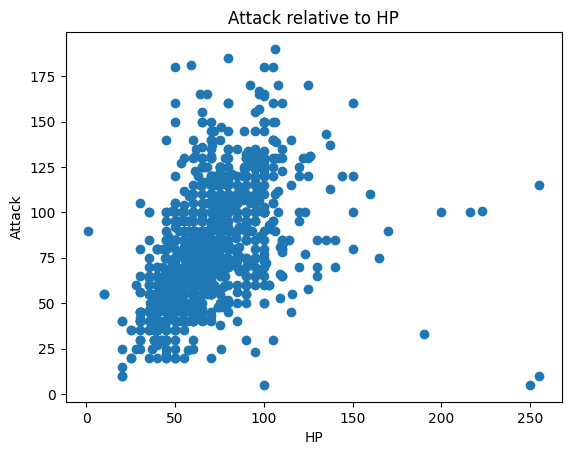

In [60]:
# Scatterplot
# The "o" makes it so it draws points rather than a line
plt.plot(df['HP'], df['Attack'], "o")
plt.xlabel('HP')
plt.ylabel('Attack')
plt.title('Attack relative to HP')

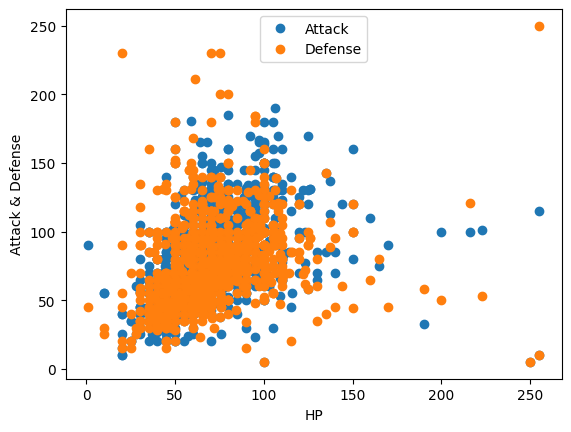

In [61]:
# Plotting multiple plots on top of one another using different colors
plt.plot(df['HP'], df['Attack'], "o")
plt.plot(df['HP'], df['Defense'], "o")
plt.xlabel('HP')
plt.ylabel('Attack & Defense')
plt.legend(['Attack','Defense'])

(array([  3.,  10.,  52., 210., 188., 257., 118., 141.,  48.,  15.,   9.,
          5.,   2.,   1.,   1.,   1.,   1.,   1.,   0.,   3.]),
 array([  1. ,  13.7,  26.4,  39.1,  51.8,  64.5,  77.2,  89.9, 102.6,
        115.3, 128. , 140.7, 153.4, 166.1, 178.8, 191.5, 204.2, 216.9,
        229.6, 242.3, 255. ]),
 <BarContainer object of 20 artists>)

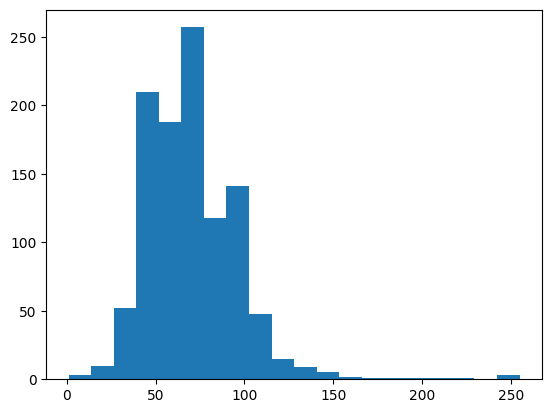

In [62]:
# To see how a variable is distributed, histograms are useful
plt.hist(df['HP'], bins = 20)

#### Seaborn

A more modern alternative to matplotlib is Seaborn. It looks a little nicer by default, and is easier to use. You can still use the same `%matplotlib inline` command to make plots show up inline.

In [63]:
import seaborn as sns

<Axes: xlabel='HP', ylabel='Attack'>

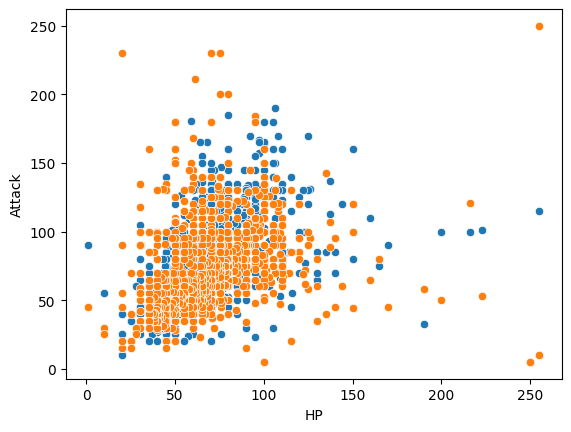

In [64]:
sns.scatterplot(x = df['HP'], y = df['Attack'])
sns.scatterplot(x = df['HP'], y = df['Defense'])

<Axes: xlabel='HP', ylabel='Count'>

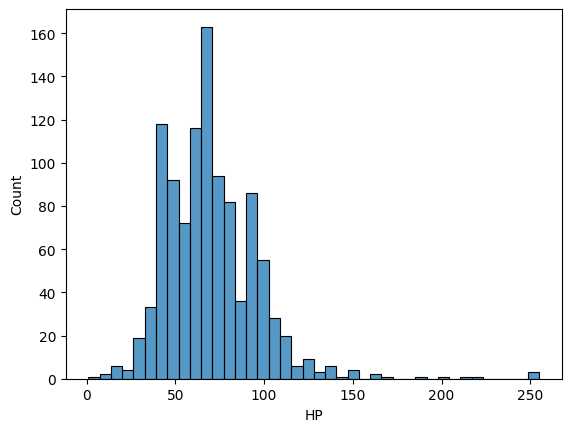

In [65]:
sns.histplot(df['HP'])

<Axes: xlabel='HP', ylabel='Density'>

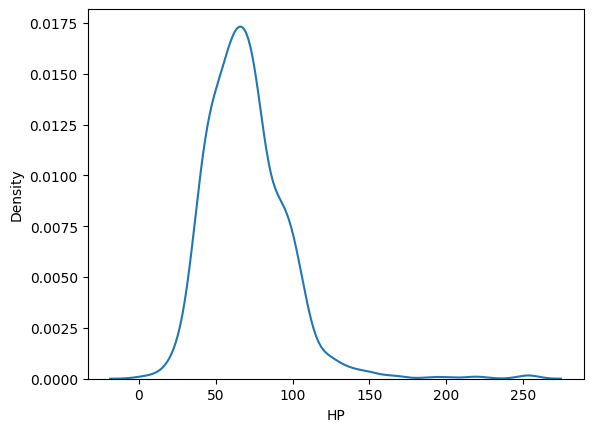

In [66]:
# This is a density plot - a smoothed version of a histogram
# When would this be preferable to a histogram?
sns.kdeplot(df['HP'])

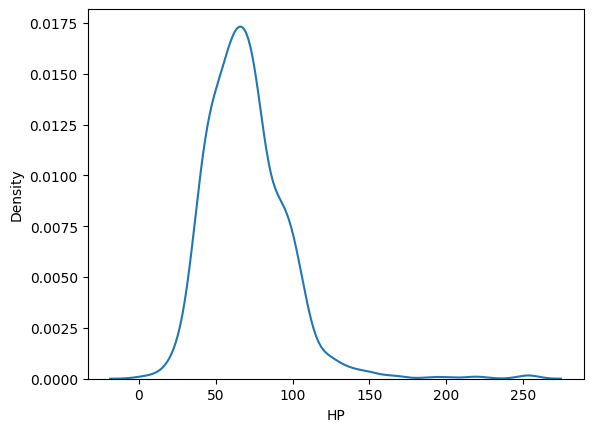

In [67]:
# Saving a plot to a file
hp_kde = sns.kdeplot(df['HP'])
fig = hp_kde.get_figure()
fig.savefig("hp_kde.png")

### Saving & loading data

#### Writing

In [68]:
df['image_url'][1]

'https://img.pokemondb.net/sprites/sword-shield/icon/eternatus-eternamax.png'

In [69]:
# With open opens a connection to a file
# the 'w' argument makes it so that it is used as a writer
with open('dataset_pokemon/image_urls.txt', 'w') as writer:
  # Then loop over every element in the df['image_url'] column
  for word in df['image_url']:
    # And write it to the file in the connection
    # The '\n' Makes a new line after each written word, so that we have one line per URL
    writer.write(word + '\n')

#### Loading

In [70]:
# Read them back in
with open('dataset_pokemon/image_urls.txt', 'r') as f:
    # The splitlines 'reverses' the '\n'
    image_urls = f.read().splitlines()
image_urls

['https://img.pokemondb.net/sprites/sword-shield/icon/blissey.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/eternatus-eternamax.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/chansey.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/guzzlord.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/zygarde-complete.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/regidrago.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/wobbuffet.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/wailord.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/alomomola.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/snorlax.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/giratina-origin.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/giratina-altered.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/drifblim.png',
 'https://img.pokemondb.net/sprites/sword-shield/icon/slaking.png',
 '

#### Appending

In [71]:
# Appending to an existing file instead of writing to a new one
text2 = ["this is not a URL", "neither is this"]
with open('dataset_pokemon/image_urls.txt', 'a') as writer:
  for word in text2:
    writer.write(word + '\n')

In [72]:
# Load it again to see what it looks like
with open('dataset_pokemon/image_urls.txt') as f:
    content = f.read().splitlines()
content[-5:] # Last 5 elements

['https://archives.bulbagarden.net/media/upload/b/ba/884GiMS8.png',
 'https://archives.bulbagarden.net/media/upload/8/83/892GiMS8.png',
 'https://archives.bulbagarden.net/media/upload/b/b8/892RGiMS8.png',
 'this is not a URL',
 'neither is this']

### os package
The os package allows you to interact with your computer's filesystem from within Python.

In [73]:
import os
#list all the files in a directory
os.listdir('dataset_pokemon')

['bridge_pokemon_move_USED_WITH_MOVE.csv',
 'bridge_move_type_MOVES_IS_TYPE.csv',
 'bridge_type_type_MOVE_EFFECTIVENESS_ON_POKEMON.csv',
 'df_items.csv',
 'image_urls.txt',
 'bridge_pokemon_pokemon_USED_IN_TEAM_WITH.csv',
 'bridge_pokemon_moves_MAY_LEARN.csv',
 'bridge_pokemon_pokemon_HAS_VARIANT.csv',
 'df_natures.csv',
 'bridge_moves_pokemon_GMAX_MOVE.csv',
 'bridge_pokemon_nature_COMMON_SPREAD.csv',
 'bridge_pokemon_type_IS_OF_TYPE.csv',
 'bridge_pokemon_pokemon_EVOLVES_FROM.csv',
 'df_types.csv',
 'df_pokemon_2.csv',
 'df_abilities.csv',
 'bridge_pokemon_ability_MAY_HAS.csv',
 'df_pokemon.csv',
 'df_moves.csv',
 'bridge_pokemon_nature_USED_WITH_ABILITY.csv',
 'bridge_pokemon_item_USED_WITH_ITEM.csv']

In [74]:
# Full path to the first file in the directory
path1 = "/content/dataset_pokemon/" + os.listdir('dataset_pokemon')[0]
path1

'/content/dataset_pokemon/bridge_pokemon_move_USED_WITH_MOVE.csv'

In [75]:
# get only the basename of a file, not the full path
os.path.basename(path1)

'bridge_pokemon_move_USED_WITH_MOVE.csv'

In [76]:
# check whether a file (or directory) exists
os.path.exists(path1)

True

In [77]:
# make a new directory
os.mkdir("new_directory")

### Exercise

Write a loop that makes one density plot for the HP of all Pokemon of a given type, and saves it to a folder called `density_plots`. Write this loop so that when you re-run it, it checks whether it has already made the plot for the respective Pokemon type, and if so, doesn't make it again.